### Importer les bibliothèques utiles [X points]

In [5]:
# pandas
import pandas as pd
# numpy
import numpy as np
# pyplot
import matplotlib.pyplot as plt
# seaborn
import seaborn as sns 

### Charger les données (en précisant que la première colonne est l'index)

In [6]:
data_url = "https://bit.ly/titanic-train-set"

print(data_url)

https://bit.ly/titanic-train-set


In [7]:
df = pd.read_csv(data_url, index_col=0)

# Partie 1 - **Analyse Préalable des Données**

### Afficher les 6 premieres et les 6 dernières lignes du dataset 

In [26]:
# afficher 6 premières lignes
df.head(6)

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
PassengerId,,,,,,,,
1,Non,3,male,22.0,1,0,7.2500,S
2,Oui,1,female,38.0,1,0,71.2833,C
3,Oui,3,female,26.0,0,0,7.9250,S
4,Oui,1,female,35.0,1,0,53.1000,S
5,Non,3,male,35.0,0,0,8.0500,S
6,Non,3,male,NaN,0,0,8.4583,Q


In [27]:
# afficher 6 dernières lignes
df.tail(6)

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
PassengerId,,,,,,,,
886,Non,3,female,39.0,0,5,29.125,Q
887,Non,2,male,27.0,0,0,13.000,S
888,Oui,1,female,19.0,0,0,30.000,S
889,Non,3,female,NaN,1,2,23.450,S
890,Oui,1,male,26.0,0,0,30.000,C
891,Non,3,male,32.0,0,0,7.750,Q


### Créer une liste contenant toutes les colonnes du dataset

In [28]:
# liste des colonnes du dataset
cols = df.columns.tolist()

print(cols)

['Survived', 'Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare', 'Embarked']


### Utiliser describe sur le dataset

In [29]:
df.describe()

,Pclass,Age,SibSp,Parch,Fare
count,891.000000,714.000000,891.000000,891.000000,891.000000
mean,2.308642,29.699118,0.523008,0.381594,32.204208
std,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.420000,0.000000,0.000000,0.000000
25%,2.000000,20.125000,0.000000,0.000000,7.910400
50%,3.000000,28.000000,0.000000,0.000000,14.454200
75%,3.000000,38.000000,1.000000,0.000000,31.000000
max,3.000000,80.000000,8.000000,6.000000,512.329200


### Utiliser info sur le dataset

In [30]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 891 entries, 1 to 891
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    object 
 1   Pclass    891 non-null    int64  
 2   Sex       891 non-null    object 
 3   Age       714 non-null    float64
 4   SibSp     891 non-null    int64  
 5   Parch     891 non-null    int64  
 6   Fare      891 non-null    float64
 7   Embarked  889 non-null    object 
dtypes: float64(2), int64(3), object(3)
memory usage: 102.6+ KB


### Afficher textuellement le nombre de valeurs nulles par colonne

In [31]:
df.isnull().sum()

Survived      0
Pclass        0
Sex           0
Age         177
SibSp         0
Parch         0
Fare          0
Embarked      2
dtype: int64

### Afficher visuellement, avec une Heatmap, les valeurs nulles par colonnes. 



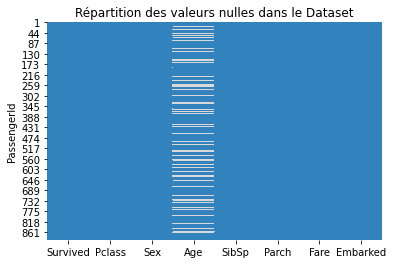

In [32]:
(sns
.heatmap(df.isnull(), cmap='tab20c', cbar=False)
.set_title("Répartition des valeurs nulles dans le Dataset"));

### Matrice de correlation

In [33]:
corrmat = df.corr()
corrmat

,Pclass,Age,SibSp,Parch,Fare
Pclass,1.000000,-0.369226,0.083081,0.018443,-0.549500
Age,-0.369226,1.000000,-0.308247,-0.189119,0.096067
SibSp,0.083081,-0.308247,1.000000,0.414838,0.159651
Parch,0.018443,-0.189119,0.414838,1.000000,0.216225
Fare,-0.549500,0.096067,0.159651,0.216225,1.000000


Text(0.5, 1.0, 'Corrélation')

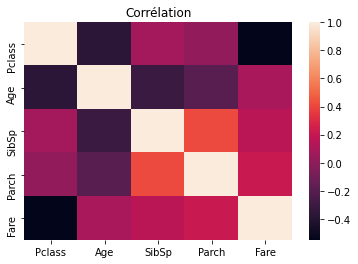

In [34]:
sns.heatmap(corrmat).set_title('Corrélation')

# Analyse Univariée

Désactivez les warnings (non-noté)

In [17]:
import warnings
warnings.filterwarnings("ignore")

Supprimez de la DataFrame les colonnes `Ticket`,`Cabin` et `Name`.

In [18]:
df = df.drop(['Ticket', 'Cabin', 'Name'], axis='columns')

Recréez ensuite la liste des colonnes.

In [19]:
cols = df.columns.tolist()

print(cols)

['Survived', 'Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare', 'Embarked']


**Affichez le compte de chaque variable dans un graphique propre et facile à lire.**



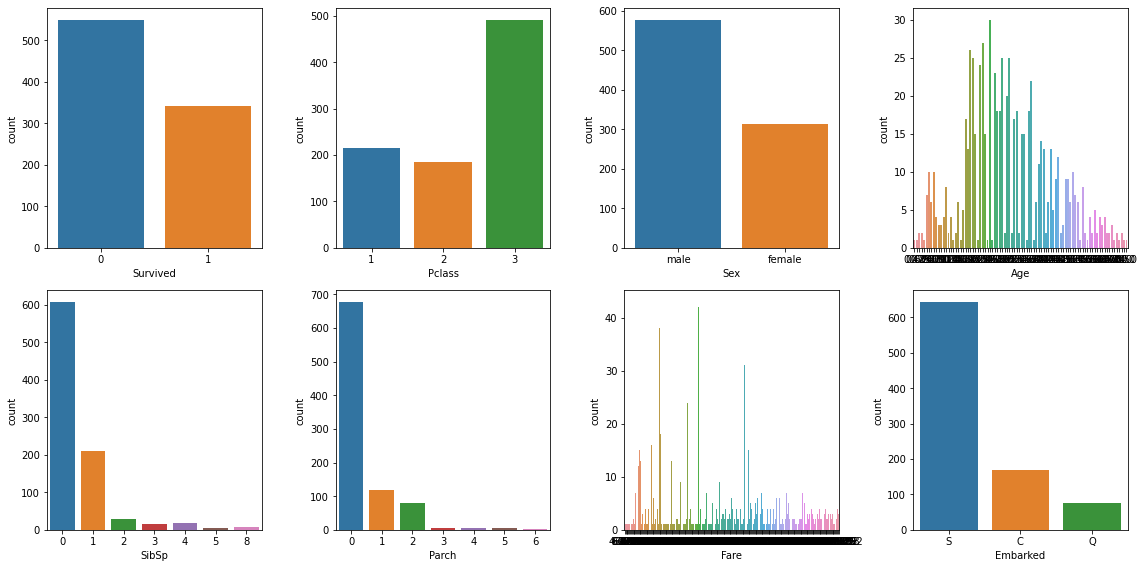

In [20]:
fig, ax = plt.subplots(2, 4, figsize = (16, 8))

def get_ij(n, n_plot_cols):
    i = n // n_plot_cols
    j = n % n_plot_cols
    return i,j

for i, col in enumerate(cols):
    idx_i,idx_j = get_ij(i, 4)
    sns.countplot(col, data=df, ax=ax[idx_i][idx_j]);

plt.tight_layout()

Question 7) Pieplot des variables à faible dimensionalité

In [21]:
cols

['Survived', 'Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare', 'Embarked']

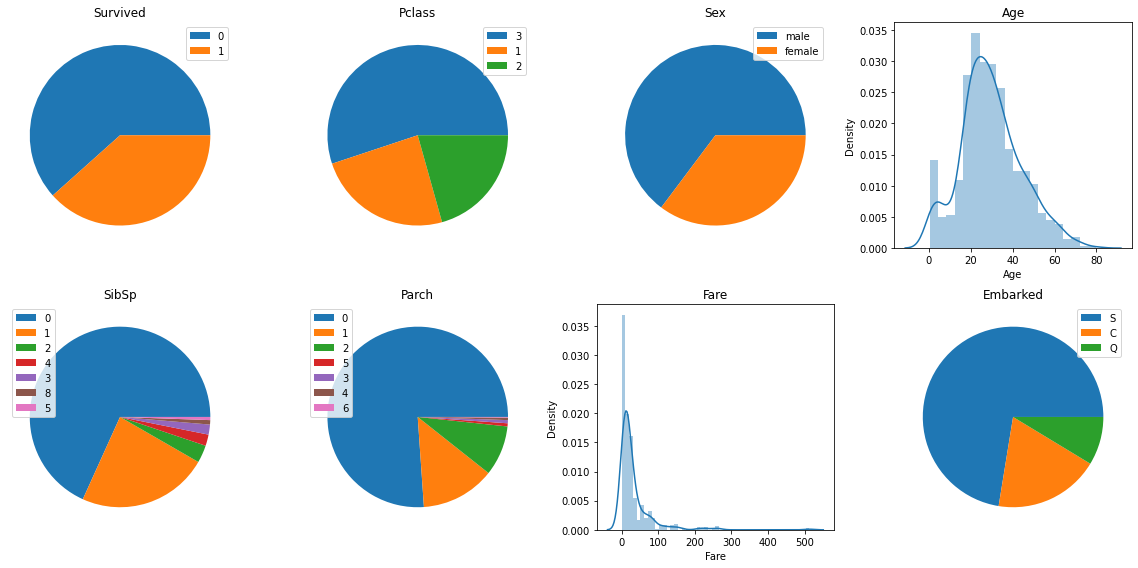

In [22]:
fig, ax = plt.subplots(2, 4, figsize = (16, 8))

def get_ij(n, n_plot_cols):
    i = n // n_plot_cols
    j = n % n_plot_cols
    return i,j

for i, col in enumerate(cols):
    idx_i,idx_j = get_ij(i, 4)
    if col not in ['Fare', 'Age']:
        data = df[col].value_counts()
        subplot=ax[idx_i][idx_j]
        subplot.pie(data)
        subplot.legend(data.index)
        subplot.title.set_text(col)
    if col in ['Fare', 'Age']:
        subplot=ax[idx_i][idx_j]
        sns.distplot(df[col], ax=subplot)
        subplot.title.set_text(col)

plt.tight_layout()

In [23]:
df["SibSp"].value_counts().index

Int64Index([0, 1, 2, 4, 3, 8, 5], dtype='int64')

# Analyse Bivariée

In [24]:
df['Survived'] = df['Survived'].map({0:"Non", 1:"Oui"})

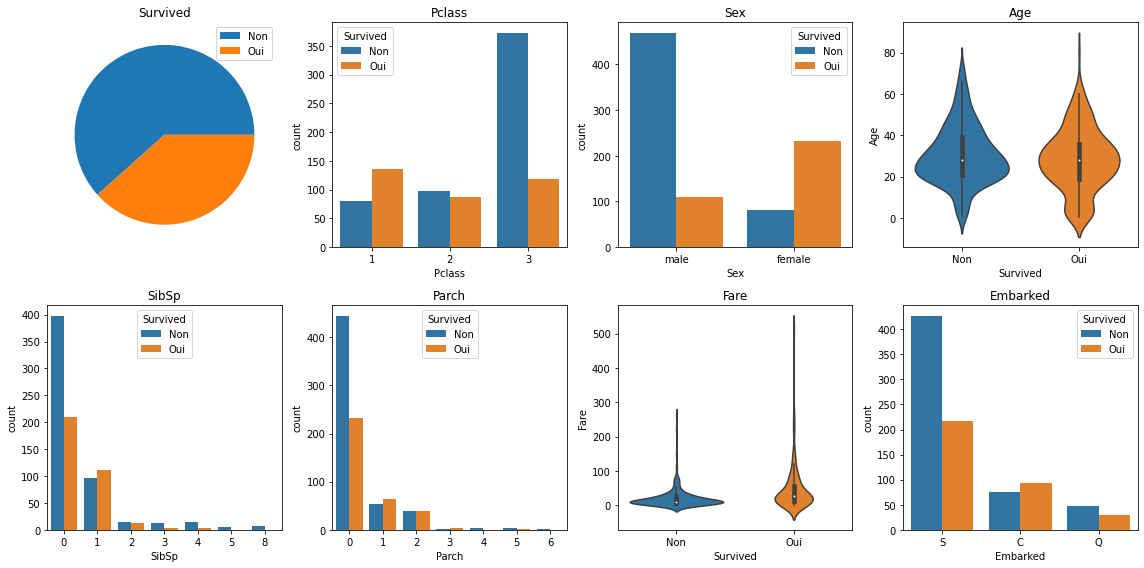

In [25]:
fig, ax = plt.subplots(2, 4, figsize = (16, 8))


def get_ij(n, n_plot_cols):
    i = n // n_plot_cols
    j = n % n_plot_cols
    return i,j

for i, col in enumerate(cols):
    idx_i,idx_j = get_ij(i, 4)
    subplot=ax[idx_i][idx_j]
    if col not in ['Survived']:
        if col in ['Fare', 'Age']:
            sns.violinplot(x="Survived", y=col,data=df,ax=subplot)
        else:
            sns.countplot(col, data=df, hue="Survived", ax=subplot)
        subplot.title.set_text(col)
    else:
        data = df[col].value_counts()
        subplot=ax[idx_i][idx_j]
        subplot.pie(data)
        subplot.legend(data.index)
        subplot.title.set_text(col)

    

plt.tight_layout()